In [185]:
import requests ## Allows to send HTTP request to a server
from bs4 import BeautifulSoup ## used to pull data out of HTML and convert data to BeautifulSoup object
import pandas as pd
from urllib.parse import urlencode ## used for reading website content, making HTTTP and HTTPS request
import csv
from requests_html import HTMLSession
from googletrans import Translator

In [264]:
list_of_Url = ['https://www.amazon.de/-/en/Samsung-Galaxy-Flip-Black-Dual/product-reviews/B09CZ9K3YH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews']
base_url = 'https://www.amazon.de/-/en/Samsung-Galaxy-Flip-Black-Dual/product-reviews/B09CZ9K3YH/'

for i in range(1, 12):
    new_url = base_url + f'ref=cm_cr_getr_d_paging_btm_next_{i}?ie=UTF8&reviewerType=all_reviews&pageNumber={i}'
    list_of_Url.append(new_url)

# Printing the generated list of URLs
for url in list_of_Url:
    print(url)

https://www.amazon.de/-/en/Samsung-Galaxy-Flip-Black-Dual/product-reviews/B09CZ9K3YH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.de/-/en/Samsung-Galaxy-Flip-Black-Dual/product-reviews/B09CZ9K3YH/ref=cm_cr_getr_d_paging_btm_next_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.de/-/en/Samsung-Galaxy-Flip-Black-Dual/product-reviews/B09CZ9K3YH/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.de/-/en/Samsung-Galaxy-Flip-Black-Dual/product-reviews/B09CZ9K3YH/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.de/-/en/Samsung-Galaxy-Flip-Black-Dual/product-reviews/B09CZ9K3YH/ref=cm_cr_getr_d_paging_btm_next_4?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.de/-/en/Samsung-Galaxy-Flip-Black-Dual/product-reviews/B09CZ9K3YH/ref=cm_cr_getr_d_paging_btm_next_5?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.de/-/

In [265]:
# Retrieve each of the url's HTML data and convert the data into a beautiful soup object
# Find, extract and storing reviewer names and review text into a list#

names = []
reviews = []
dates = []
contents=[]
data_string = ""


for url in list_of_Url:
    params = {'api_key': "c9010d74903f7f44a05b03b2f1b4f2b6", 'url': url}
    response = requests.get('http://api.scraperapi.com/',
                            params = urlencode(params))
    soup = BeautifulSoup(response.text, 'html.parser')

    for item in soup.find_all("span", class_ = "a-profile-name"):
        data_string = data_string + item.get_text()
        names.append(data_string)
        data_string = ""

    for item in soup.find_all("span", {"data-hook": "review-body"}):
        data_string=data_string + item.get_text()
        reviews.append(data_string)
        data_string = ""

    for item in soup.find_all("span", {"data-hook": "review-date"} ):
        data_string=data_string + item.get_text()
        dates.append(data_string)
        data_string =""


    for item in soup.find_all("span", class_ = "cr-original-review-content" ):
        data_string= data_string + item.get_text()
        contents.append(data_string)
        data_string =""


In [266]:
# create the dictionary
reviews_dict = {'Reviewer Name' : names, 'Reviews': reviews, 'Review Date':dates, 'Category': contents}

#Print the lengths of each list
print(len(names), len(reviews))

104 80


In [267]:
df = pd.DataFrame.from_dict(reviews_dict, orient='index')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
Reviewer Name,Zeisler,T.Schleef,Zeisler,Miku,TM,FKA,Amazon-Kunde,karin,Steffen Schmidt,T.Schleef,...,None,None,None,None,None,None,None,None,None,None
Reviews,\nSehr gut\n,"\nGutes Smartphone , liegt gut in der Hand. Le...","\nLeicht zu bedienen und tolles Design, passt ...",\nIch kann mich zur Haptik und Funktionalität ...,\nTolles Handy . Bin begeistert schnell schick...,\nHatte mit dem Kauf dieses Handys schon lange...,\nSo jetzt kann ich zu dem Gerät etwas sagen.D...,\nLeider löst sich die Sicherheitsfolien schon...,\nok\n,\nIch bin mit dem Preis/ Leistungsverhältnis z...,...,None,None,None,None,None,None,None,None,None,None
Review Date,Reviewed in Germany on 20 July 2023,Reviewed in Germany on 25 May 2023,Reviewed in Germany on 11 June 2023,Reviewed in Germany on 18 April 2023,Reviewed in Germany on 6 May 2023,Reviewed in Germany on 23 December 2022,Reviewed in Germany on 10 September 2022,Reviewed in Germany on 23 July 2023,Reviewed in Germany on 11 January 2023,Reviewed in Germany on 22 December 2022,...,None,None,None,None,None,None,None,None,None,None
Category,Sehr gut,Sehr gut,Gut,"Gutes Smartphone , liegt gut in der Hand. Leid...",Tolles Handy,"Leicht zu bedienen und tolles Design, passt in...",sehr gutes Smartphone,Ich kann mich zur Haptik und Funktionalität nu...,Super geil,Tolles Handy . Bin begeistert schnell schick ....,...,Bestes Smartphone ever!,Hab dieses Smartphone meiner Frau zum Geburtst...,gut aber,"Das Handy ist an sich gut, aber der Akku nicht...",Sehr gut,Finde es meiner Meinung nach sehr gut,"Schönes Handy, meine Frau ist begeistert!","Gibt nichts zu mekern, alles so wie es sein soll.",Schade....,..... das bei diesem Smartphone alles fehlt da...


In [268]:
# deleting all the columns having missing values

df.dropna(axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Reviewer Name,Zeisler,T.Schleef,Zeisler,Miku,TM,FKA,Amazon-Kunde,karin,Steffen Schmidt,T.Schleef,...,Jon Tomes,M. Legat,editon,editon,Jason,Said Ceyhan,Zeisler,T.Schleef,Christopher,Meiko
Reviews,\nSehr gut\n,"\nGutes Smartphone , liegt gut in der Hand. Le...","\nLeicht zu bedienen und tolles Design, passt ...",\nIch kann mich zur Haptik und Funktionalität ...,\nTolles Handy . Bin begeistert schnell schick...,\nHatte mit dem Kauf dieses Handys schon lange...,\nSo jetzt kann ich zu dem Gerät etwas sagen.D...,\nLeider löst sich die Sicherheitsfolien schon...,\nok\n,\nIch bin mit dem Preis/ Leistungsverhältnis z...,...,\nFünf-Sterne-Lieferung und Produkt\n,\nTolles Smartphone\n,"\nVor dem Kauf des Flips, habe ich mich in de...","\nAlles Perfekt, sehr schnelle Lieferung und a...",\nHab dieses Smartphone meiner Frau zum Geburt...,"\nDas Handy ist an sich gut, aber der Akku nic...",\nFinde es meiner Meinung nach sehr gut\n,\nOkay\n,"\nGibt nichts zu mekern, alles so wie es sein ...",\n..... das bei diesem Smartphone alles fehlt ...
Review Date,Reviewed in Germany on 20 July 2023,Reviewed in Germany on 25 May 2023,Reviewed in Germany on 11 June 2023,Reviewed in Germany on 18 April 2023,Reviewed in Germany on 6 May 2023,Reviewed in Germany on 23 December 2022,Reviewed in Germany on 10 September 2022,Reviewed in Germany on 23 July 2023,Reviewed in Germany on 11 January 2023,Reviewed in Germany on 22 December 2022,...,Reviewed in Germany 🇩🇪 on 26 April 2022,Reviewed in Germany 🇩🇪 on 6 August 2022,Reviewed in Germany 🇩🇪 on 23 April 2022,Reviewed in Germany 🇩🇪 on 18 October 2021,Reviewed in Germany 🇩🇪 on 31 July 2022,Reviewed in Germany 🇩🇪 on 21 December 2022,Reviewed in Germany 🇩🇪 on 26 July 2022,Reviewed in Germany 🇩🇪 on 18 November 2021,Reviewed in Germany 🇩🇪 on 9 January 2022,Reviewed in Germany 🇩🇪 on 3 October 2021
Category,Sehr gut,Sehr gut,Gut,"Gutes Smartphone , liegt gut in der Hand. Leid...",Tolles Handy,"Leicht zu bedienen und tolles Design, passt in...",sehr gutes Smartphone,Ich kann mich zur Haptik und Funktionalität nu...,Super geil,Tolles Handy . Bin begeistert schnell schick ....,...,Sehr gut,Ich liebe dieses Smartphon. Die Lieferun kam s...,Tolles Handy,Sehr schönes Handy. Ausgezeichnete Verarbeitun...,Handling ist super,Ich wollte wieder ein kleines handliches Handy...,"Das Handy ist aufjedenfall sein Geld wert,supe...",Den Fingerabdruckleser finde ich Klasse habe e...,Es ist ein super Handy.,Ich bin sehr zufrieden. Die Einstellungen klap...


In [269]:
# transposing the dataframe
prod_reviews = df.T
print(prod_reviews.head(10))

     Reviewer Name                                            Reviews  \
0          Zeisler                                       \nSehr gut\n   
1        T.Schleef  \nGutes Smartphone , liegt gut in der Hand. Le...   
2          Zeisler  \nLeicht zu bedienen und tolles Design, passt ...   
3             Miku  \nIch kann mich zur Haptik und Funktionalität ...   
4               TM  \nTolles Handy . Bin begeistert schnell schick...   
5              FKA  \nHatte mit dem Kauf dieses Handys schon lange...   
6     Amazon-Kunde  \nSo jetzt kann ich zu dem Gerät etwas sagen.D...   
7            karin  \nLeider löst sich die Sicherheitsfolien schon...   
8  Steffen Schmidt                                             \nok\n   
9        T.Schleef  \nIch bin mit dem Preis/ Leistungsverhältnis z...   

                                Review Date  \
0       Reviewed in Germany on 20 July 2023   
1        Reviewed in Germany on 25 May 2023   
2       Reviewed in Germany on 11 June 2023   
3      R

In [270]:
# removing special characters from review text
prod_reviews['Reviews'] = prod_reviews['Reviews'].str.replace('\n','')
prod_reviews["Review Date"] = prod_reviews["Review Date"].str.extract(r' on (\d+\s+\w+\s+\d+)')[0]
prod_reviews["Review Date"] = pd.to_datetime(prod_reviews["Review Date"], format="%d %B %Y")
prod_reviews.head(10)
#print(prod_reviews.dtypes)

,Reviewer Name,Reviews,Review Date,Category
0,Zeisler,Sehr gut,2023-07-20,Sehr gut
1,T.Schleef,"Gutes Smartphone , liegt gut in der Hand. Leid...",2023-05-25,Sehr gut
2,Zeisler,"Leicht zu bedienen und tolles Design, passt in...",2023-06-11,Gut
3,Miku,Ich kann mich zur Haptik und Funktionalität nu...,2023-04-18,"Gutes Smartphone , liegt gut in der Hand. Leid..."
4,TM,Tolles Handy . Bin begeistert schnell schick ....,2023-05-06,Tolles Handy
5,FKA,Hatte mit dem Kauf dieses Handys schon lange g...,2022-12-23,"Leicht zu bedienen und tolles Design, passt in..."
6,Amazon-Kunde,So jetzt kann ich zu dem Gerät etwas sagen.Die...,2022-09-10,sehr gutes Smartphone
7,karin,Leider löst sich die Sicherheitsfolien schon n...,2023-07-23,Ich kann mich zur Haptik und Funktionalität nu...
8,Steffen Schmidt,ok,2023-01-11,Super geil
9,T.Schleef,Ich bin mit dem Preis/ Leistungsverhältnis zuf...,2022-12-22,Tolles Handy . Bin begeistert schnell schick ....


In [170]:
filtered_reviews = prod_reviews[prod_reviews['Reviews'].str.contains('None')]
filtered_reviews

,Reviewer Name,Reviews,Review Date,Category


In [174]:
from translate import Translator
translator = Translator(from_lang='de', to_lang='en')
def translate_text(text):
    return translator.translate(text)
translated_reviews = prod_reviews.copy()
translated_reviews['Reviews'] = translated_reviews['Reviews'].apply(translate_text)
translated_reviews['Category'] = translated_reviews['Category'].apply(translate_text)


In [ ]:
translated_reviews.head(10)

In [173]:
# converting dataframe to CSV
translated_reviews.to_csv('reviews.csv', index=False, header=True)

In [271]:
## Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import string
import ssl
ssl._create_default_https_context = ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/akshatha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshatha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [272]:
def preprocess_text(text):
    text=text.lower()
    translator=str.maketrans('', '', string.punctuation)
    text=text.translate(translator)

    #tokenizer = RegexpTokenizer(r'\w+')
    words = nltk.word_tokenize(text)

    stop_words = set(stopwords.words('german'))
    words=[word for word in words if word not in stop_words]

    processed_text = ' '.join(words)
    return processed_text

prod_reviews['Reviews'] = prod_reviews['Reviews'].apply(preprocess_text)
prod_reviews['Category'] = prod_reviews['Category'].apply(preprocess_text)
prod_reviews.head(10)

,Reviewer Name,Reviews,Review Date,Category
0,Zeisler,gut,2023-07-20,gut
1,T.Schleef,gutes smartphone liegt gut hand leider zeit sc...,2023-05-25,gut
2,Zeisler,leicht bedienen tolles design passt kleinen ha...,2023-06-11,gut
3,Miku,haptik funktionalität lobend äußern ideal hose...,2023-04-18,gutes smartphone liegt gut hand leider zeit sc...
4,TM,tolles handy begeistert schnell schick akku lä...,2023-05-06,tolles handy
5,FKA,kauf handys schon lange geliebäugelt 500€ erst...,2022-12-23,leicht bedienen tolles design passt kleinen ha...
6,Amazon-Kunde,gerät sagendie lieferung verzögerte erheblich ...,2022-09-10,gutes smartphone
7,karin,leider löst sicherheitsfolien schon drei monat...,2023-07-23,haptik funktionalität lobend äußern ideal hose...
8,Steffen Schmidt,ok,2023-01-11,super geil
9,T.Schleef,preis leistungsverhältnis zufrieden,2022-12-22,tolles handy begeistert schnell schick akku lä...


In [273]:
## rule based sentiment analysis 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/akshatha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [274]:
# creating sentimentintensityanalyzer object
analyzer = SentimentIntensityAnalyzer()

In [275]:
def sent_scores(review_text):
    return analyzer.polarity_scores(review_text)

prod_reviews['sentiment_scores'] = prod_reviews['Reviews'].apply(sent_scores)

def sentiment_label(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
prod_reviews['compound_score'] = prod_reviews['sentiment_scores'].apply(lambda score: score['compound'])
prod_reviews['sentiment'] = prod_reviews['compound_score'].apply(sentiment_label)

prod_reviews

,Reviewer Name,Reviews,Review Date,Category,sentiment_scores,compound_score,sentiment
0,Zeisler,gut,2023-07-20,gut,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,T.Schleef,gutes smartphone liegt gut hand leider zeit sc...,2023-05-25,gut,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.4939,positive
2,Zeisler,leicht bedienen tolles design passt kleinen ha...,2023-06-11,gut,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,Miku,haptik funktionalität lobend äußern ideal hose...,2023-04-18,gutes smartphone liegt gut hand leider zeit sc...,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.5267,positive
4,TM,tolles handy begeistert schnell schick akku lä...,2023-05-06,tolles handy,"{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'comp...",0.5994,positive
...,...,...,...,...,...,...,...
75,Said Ceyhan,handy gut akku preisleistung 3 sterne,2022-12-21,kleines handliches handy galaxy z flip 3 5g 25...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
76,Zeisler,finde meinung gut,2022-07-26,handy aufjedenfall geld wertsuper kamera,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
77,T.Schleef,okay,2021-11-18,fingerabdruckleser finde klasse direkt eingest...,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2263,positive
78,Christopher,gibt mekern,2022-01-09,super handy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [276]:
from nltk import pos_tag
from nltk import ne_chunk
from nltk.tokenize import word_tokenize, PunktSentenceTokenizer
nltk.download('averaged_perception_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Error loading averaged_perception_tagger: Package
[nltk_data]     'averaged_perception_tagger' not found in index
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/akshatha/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/akshatha/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [293]:
# Function to preprocess text (similar to your preprocess_text function)
def preprocess_text(text):
    text = text.lower()
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    return words

# Apply the preprocessing function to each review and create a new column for preprocessed words
prod_reviews['Preprocessed_Reviews'] = prod_reviews['Reviews'].apply(preprocess_text)


aspect_keywords = {
    'delivery': ['delivery', 'delivered'],
    'service': ['service', 'customer support'],
    'product quality': ['product quality'],
    'money' : ['money']
}

# Function to categorize the reviews based on aspect keywords
def categorize_reviews(review):
    aspects = []
    for aspect, keywords in aspect_keywords.items():
        for keyword in keywords:
            if keyword in review:
                aspects.append(aspect)
                break
    return ', '.join(aspects) if aspects else 'Other'

# Apply the categorization function to each review and create a new column for aspect categories
prod_reviews['Aspect_Category'] = prod_reviews['Preprocessed_Reviews'].apply(categorize_reviews)

# Count the occurrences of each aspect category
aspect_counts = prod_reviews['Aspect_Category'].explode().value_counts()

print(aspect_counts)
prod_reviews


Other       76
service      3
delivery     1
Name: Aspect_Category, dtype: int64


,Reviewer Name,Reviews,Review Date,Category,sentiment_scores,compound_score,sentiment,Preprocessed_Reviews,Aspect_Category
0,Zeisler,gut,2023-07-20,gut,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,[gut],Other
1,T.Schleef,gutes smartphone liegt gut hand leider zeit sc...,2023-05-25,gut,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.4939,positive,"[gutes, smartphone, liegt, gut, hand, leider, ...",Other
2,Zeisler,leicht bedienen tolles design passt kleinen ha...,2023-06-11,gut,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,"[leicht, bedienen, tolles, design, passt, klei...",Other
3,Miku,haptik funktionalität lobend äußern ideal hose...,2023-04-18,gutes smartphone liegt gut hand leider zeit sc...,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.5267,positive,"[haptik, funktionalität, lobend, äußern, ideal...",Other
4,TM,tolles handy begeistert schnell schick akku lä...,2023-05-06,tolles handy,"{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'comp...",0.5994,positive,"[tolles, handy, begeistert, schnell, schick, a...",Other
...,...,...,...,...,...,...,...,...,...
75,Said Ceyhan,handy gut akku preisleistung 3 sterne,2022-12-21,kleines handliches handy galaxy z flip 3 5g 25...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,"[handy, gut, akku, preisleistung, 3, sterne]",Other
76,Zeisler,finde meinung gut,2022-07-26,handy aufjedenfall geld wertsuper kamera,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,"[finde, meinung, gut]",Other
77,T.Schleef,okay,2021-11-18,fingerabdruckleser finde klasse direkt eingest...,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2263,positive,[okay],Other
78,Christopher,gibt mekern,2022-01-09,super handy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,"[gibt, mekern]",Other


In [294]:
filtered_df = prod_reviews.query("Aspect_Category != 'Other'")
filtered_df

,Reviewer Name,Reviews,Review Date,Category,sentiment_scores,compound_score,sentiment,Preprocessed_Reviews,Aspect_Category
30,Ozren Radic,the media could not be loaded magical phone ma...,2022-06-29,nachtrag gerät geliefert,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...",0.9062,positive,"[media, could, loaded, magical, phone, magical...",delivery
55,Anke Reil,samsung galaxy z flip 3 seit langem mal bewegt...,2022-06-30,handy tut klappfunktion praktisch handy liegt ...,"{'neg': 0.006, 'neu': 0.975, 'pos': 0.019, 'co...",0.7269,positive,"[samsung, galaxy, z, flip, 3, seit, langem, ma...",service
65,Leopold Hladik,kaufdatum 11082021 displaybruch 29042022rückga...,2022-05-10,kauft handy vorhabt 6 monaten eh neues kaufen ...,"{'neg': 0.0, 'neu': 0.965, 'pos': 0.035, 'comp...",0.6597,positive,"[kaufdatum, 11082021, displaybruch, 29042022rü...",service
67,Vali Bradea,ganz nettes gerät nix dauer gibt komplett geis...,2022-05-19,display 9 monatiger nutzung intensiv mitte geb...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,"[ganz, nettes, gerät, nix, dauer, gibt, komple...",service


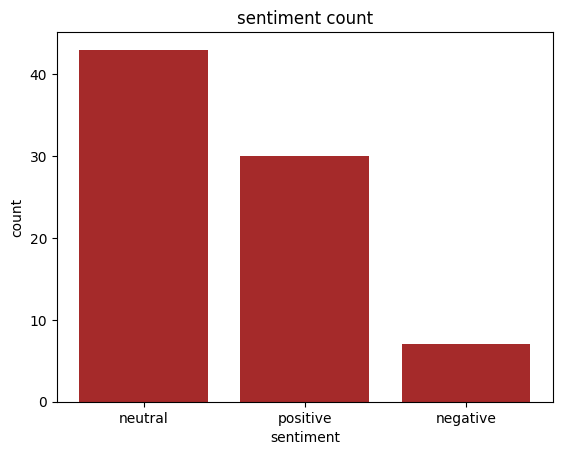

In [301]:
import matplotlib.pyplot as plt
sentiment_counts = prod_reviews['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color='brown')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('sentiment count')
plt.show()

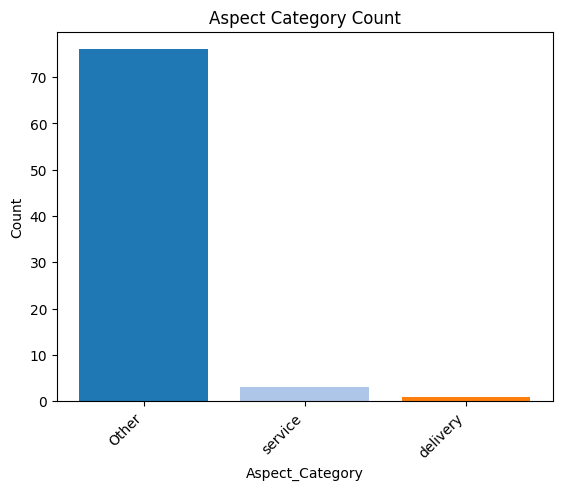

In [300]:
Aspect_Category_count = prod_reviews['Aspect_Category'].value_counts().reset_index()
Aspect_Category_count.columns = ['Aspect_Category', 'Count']
colors = plt.cm.tab20(range(len(Aspect_Category_count)))
plt.bar(Aspect_Category_count['Aspect_Category'], Aspect_Category_count['Count'], color=colors)
plt.xlabel('Aspect_Category')
plt.ylabel('Count')
plt.title('Aspect Category Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()